# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | neverkino
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | christchurch
Processing Record 6 of Set 1 | yoko
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | benjamin constant
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | herceg novi
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | ahau
City not found. Skipping...
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | harstad
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kapuskasing
Processing Record 21 of Set 1 | mount

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,neverkino,52.7854,46.7417,3.32,96,93,3.71,RU,1699932950
1,grytviken,-54.2811,-36.5092,1.66,98,100,3.31,GS,1699932950
2,iqaluit,63.7506,-68.5145,-17.95,64,0,2.06,CA,1699932950
3,bethel,41.3712,-73.4140,3.85,82,0,2.06,US,1699932950
4,christchurch,-43.5333,172.6333,25.11,36,20,9.77,NZ,1699932809


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neverkino,52.7854,46.7417,3.32,96,93,3.71,RU,1699932950
1,grytviken,-54.2811,-36.5092,1.66,98,100,3.31,GS,1699932950
2,iqaluit,63.7506,-68.5145,-17.95,64,0,2.06,CA,1699932950
3,bethel,41.3712,-73.4140,3.85,82,0,2.06,US,1699932950
4,christchurch,-43.5333,172.6333,25.11,36,20,9.77,NZ,1699932809


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

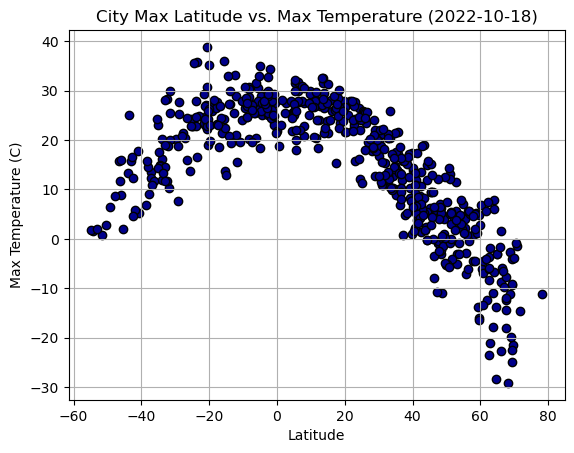

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="darkblue", marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

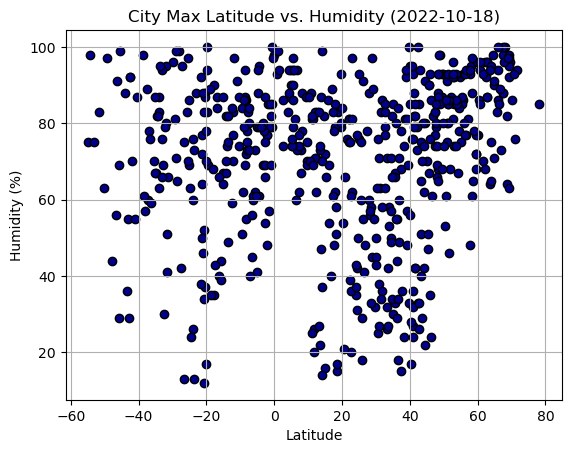

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="darkblue", marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

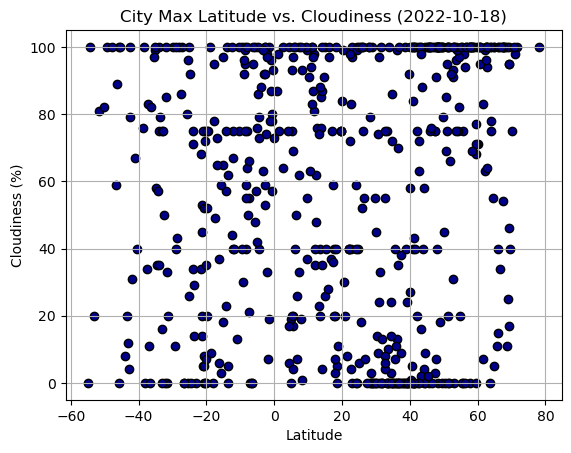

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="darkblue", marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

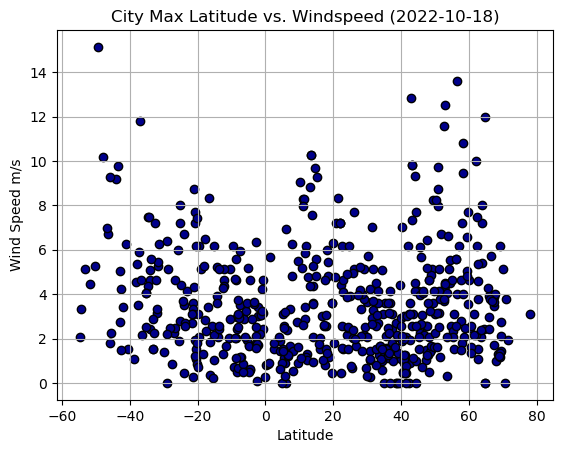

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="darkblue", marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Windspeed (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, xy):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    # Calculate and print the r-value (correlation coefficient)
    print(f"The r-value is: {rvalue**2}")

    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neverkino,52.7854,46.7417,3.32,96,93,3.71,RU,1699932950
2,iqaluit,63.7506,-68.5145,-17.95,64,0,2.06,CA,1699932950
3,bethel,41.3712,-73.4140,3.85,82,0,2.06,US,1699932950
5,yoko,5.5333,12.3167,18.01,97,97,1.12,CM,1699932950
13,herceg novi,42.4531,18.5375,13.49,100,100,0.00,ME,1699932952


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,1.66,98,100,3.31,GS,1699932950
4,christchurch,-43.5333,172.6333,25.11,36,20,9.77,NZ,1699932809
6,port-aux-francais,-49.3500,70.2167,6.46,97,100,15.14,TF,1699932951
7,west island,-12.1568,96.8225,28.99,70,40,4.63,CC,1699932951
8,avarua,-21.2078,-159.7750,23.03,64,20,3.60,CK,1699932700


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7959396364573517


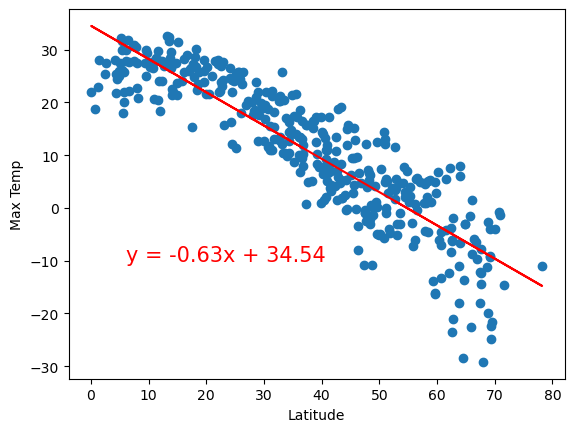

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.5246561578186527


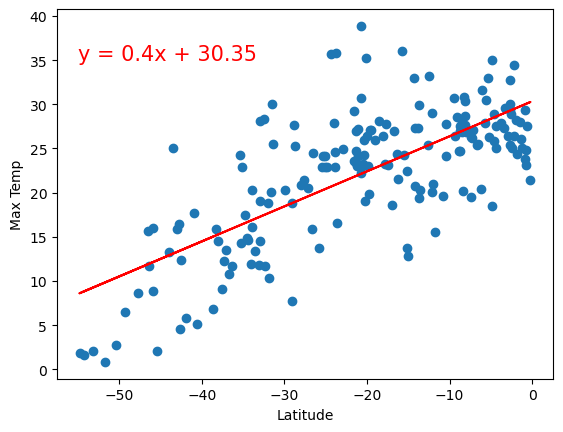

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** As we have greater latitude in the Northern Hemisphere the temperature decreases. In the Southern Hempisphere we experience as the latitude increases the temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06118551681279477


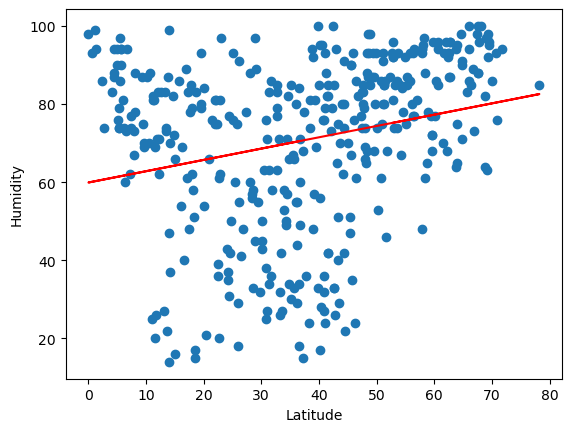

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 0.0016186277746092672


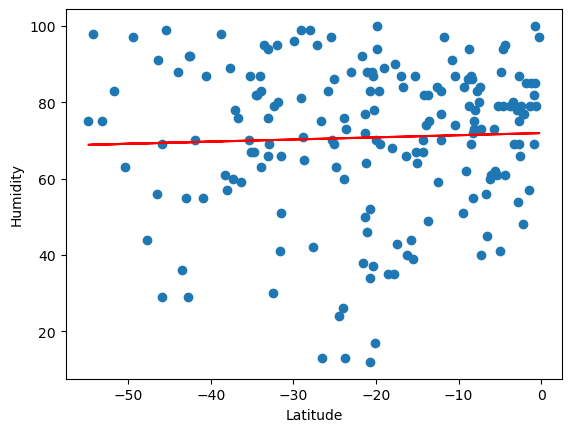

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

**Discussion about the linear relationship:** There is a positive relationship between Humidity and Latitude in the Northern Hemisphere. As the Latitude increases the humidity increases. In the Southern Hemisphere the is a neutral relationship where the Humidity does not increase nor decrease as the Latitude changes. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


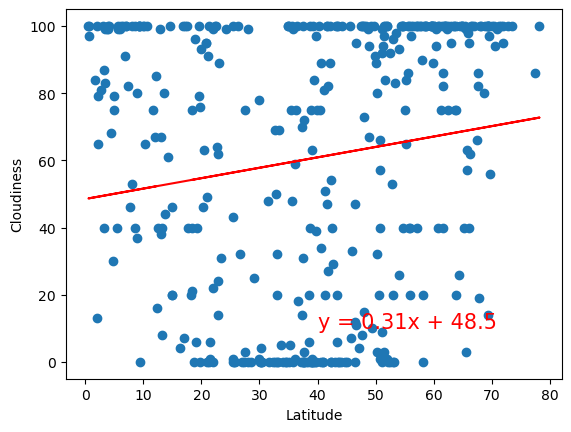

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 12))

The r-value is: 0.02056735429994368


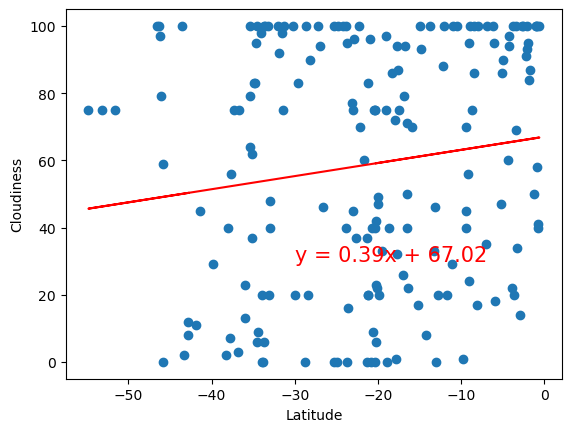

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 12))

**Discussion about the linear relationship:** Between both hempispheres there is a slight positive relationship between an increase in Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


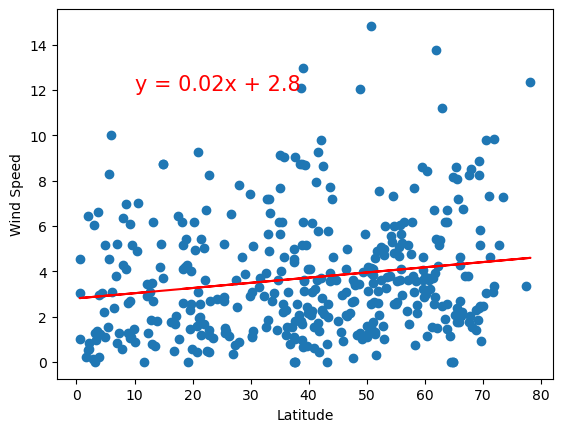

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

The r-value is: 0.062239040700515696


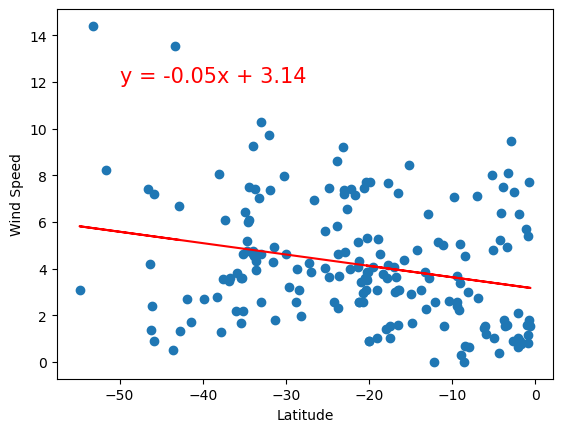

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** In the North the Wind Speeds increase with increased Latitude while in the Southern Hempisphere the Wind Speeds decrease as the Latitude increases.